In [9]:
import glob
import numpy
import paths

def average_network(folders_in, files_out):
    """
    Создание усредненной сети.
    
    :param folders_in: Папки, где хранятся сети.
    :param files_out: Файлы усредненных сетей.
    :return: 
    """
    states_0 = ['0bk', 'win', 'l', 'story', 'rnd', 'relation', 'neut']
    states_1 = ['2bk', 'loss', 'r', 'math', 'mental', 'match', 'fear']
    
    files = sorted(glob.glob(f'{folders_in[0]}/*') + glob.glob(f'{folders_in[1]}/*') +
                   glob.glob(f'{folders_in[2]}/*') + glob.glob(f'{folders_in[3]}/*'))
    files_0 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_0)]
    files_1 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_1)]

    A_0 = numpy.mean([numpy.load(file) for file in files_0], axis=0)
    A_1 = numpy.mean([numpy.load(file) for file in files_1], axis=0)

    numpy.save(files_out[0], A_0)
    numpy.save(files_out[1], A_1)

In [3]:
average_network(paths.folders_mean_ensemble_edges_test_wm, paths.average_network_wm)
average_network(paths.folders_pca_ensemble_edges_test_gambling, paths.average_network_gambling)
average_network(paths.folders_pca_ensemble_edges_test_motor, paths.average_network_motor)
average_network(paths.folders_pca_ensemble_edges_test_language, paths.average_network_language)
average_network(paths.folders_pca_ensemble_edges_test_social, paths.average_network_social)
average_network(paths.folders_pca_ensemble_edges_test_relational, paths.average_network_relational)
average_network(paths.folders_pca_ensemble_edges_test_emotion, paths.average_network_emotion)

In [8]:
# Проверим средний вес ребер сетей
print(numpy.mean(numpy.load(paths.average_network_wm[0])), numpy.mean(numpy.load(paths.average_network_wm[1])))
print(numpy.mean(numpy.load(paths.average_network_gambling[0])), numpy.mean(numpy.load(paths.average_network_gambling[1])))
print(numpy.mean(numpy.load(paths.average_network_motor[0])), numpy.mean(numpy.load(paths.average_network_motor[1])))
print(numpy.mean(numpy.load(paths.average_network_language[0])), numpy.mean(numpy.load(paths.average_network_language[1])))
print(numpy.mean(numpy.load(paths.average_network_social[0])), numpy.mean(numpy.load(paths.average_network_social[1])))
print(numpy.mean(numpy.load(paths.average_network_relational[0])), numpy.mean(numpy.load(paths.average_network_relational[1])))
print(numpy.mean(numpy.load(paths.average_network_emotion[0])), numpy.mean(numpy.load(paths.average_network_emotion[1])))

-0.22190429865818145 0.2219857863191833
-0.10027654142658776 0.09921072798640121
-0.26396086720782747 0.2633400991088735
-0.4430803067763874 0.4440456337671121
-0.20582439728027807 0.20582292912049088
-0.22488466799740423 0.2239682677137376
-0.07763506409183514 0.07836254356031457


In [31]:
# Посмотрим на распределение весов перед фильтрацией 
import matplotlib.pyplot as plt

def weight_distribution(file0, file1, quantiles, bins=75):
    """"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    matrices = [numpy.load(file0), numpy.load(file1)]
    titles = [file0.split('/')[-1][:-4], file1.split('/')[-1][:-4]]
    
    for ax, mat, title, qs in zip(axes, matrices, titles, [1 - numpy.array(quantiles), numpy.array(quantiles)]):
        # Создаем копию, чтобы не изменять оригинал, и заменяем диагональные элементы на NaN
        numpy.fill_diagonal(mat, numpy.nan)
        
        # Получаем веса в виде одномерного массива и отфильтровываем NaN
        weights = mat.flatten()
        weights = weights[~numpy.isnan(weights)]
        
        # Вычисляем заданный квантиль
        q_values = numpy.quantile(weights, qs)
        
        # Строим гистограмму распределения весов
        ax.hist(weights, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
        for q, q_value in zip(qs, q_values):
            ax.axvline(q_value, color='red', linestyle='dashed', linewidth=1.5,
                       label=f'Квантиль {q:.2f}: {q_value:.3f}')

        ax.set_xlabel('Weight')
        ax.set_ylabel('Частота')
        ax.set_title(title)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

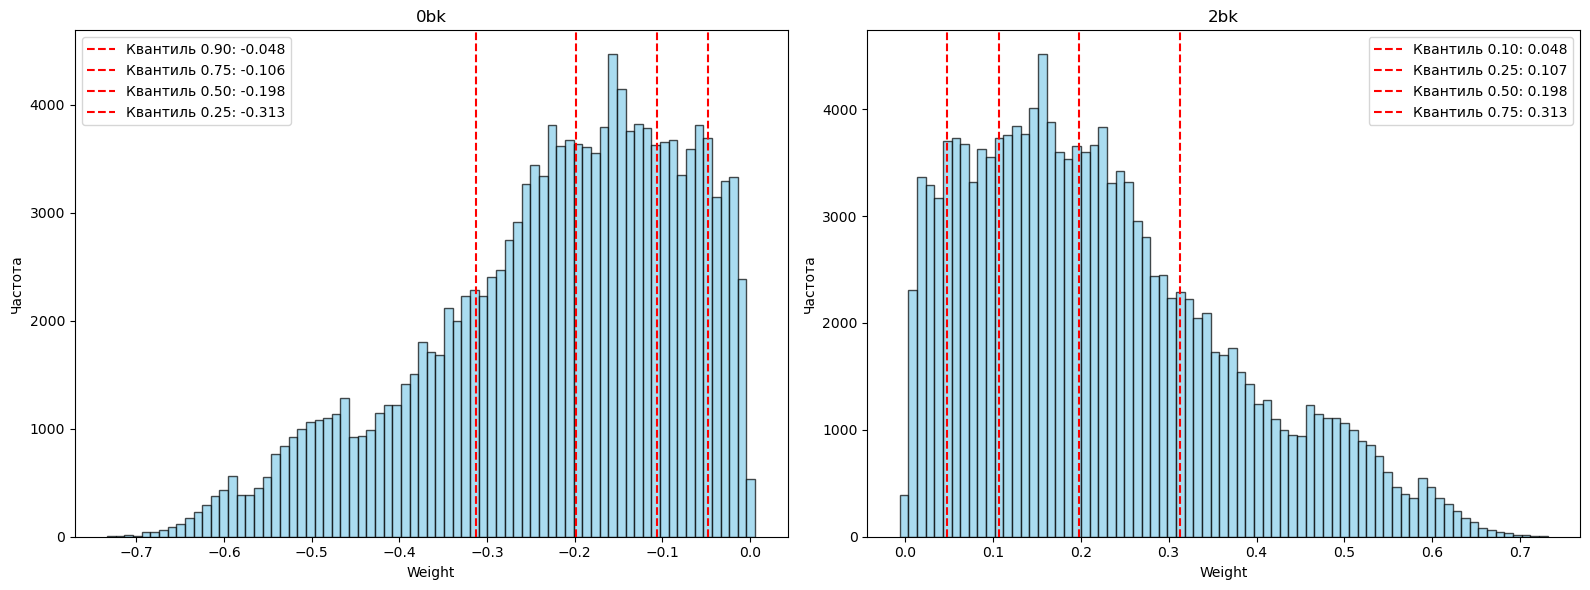

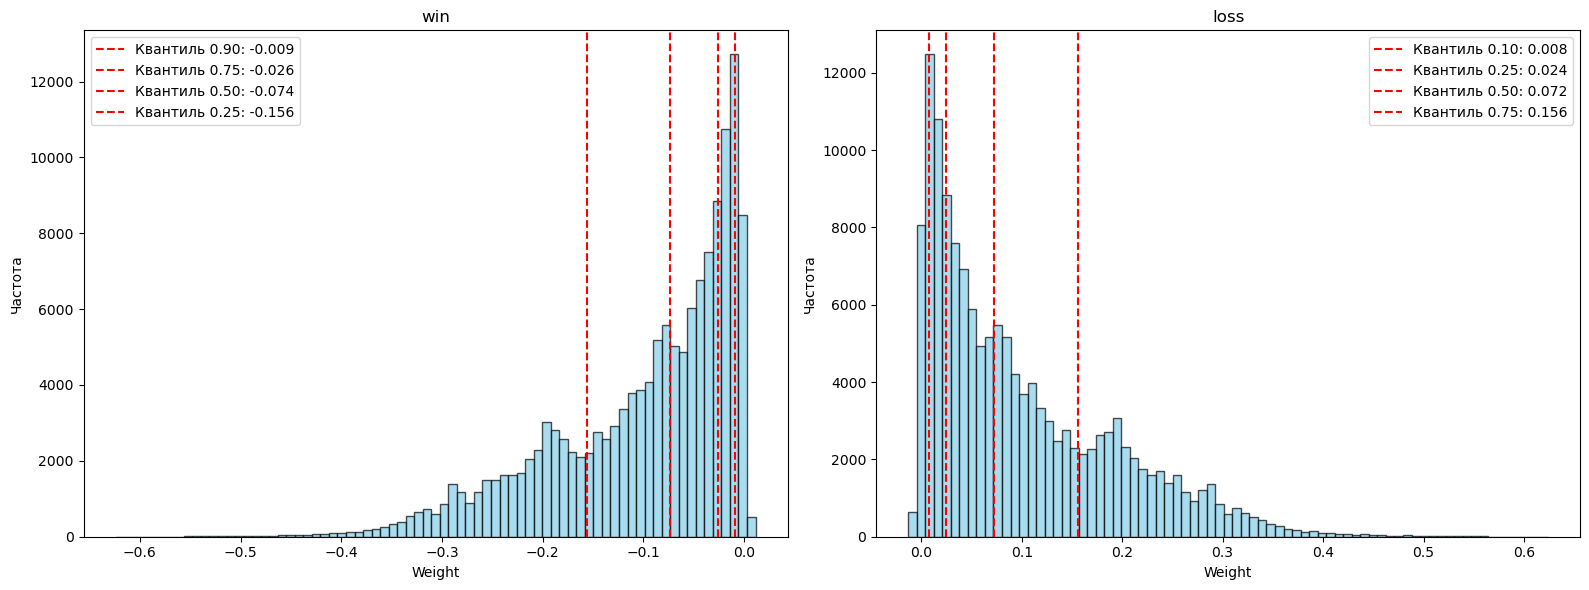

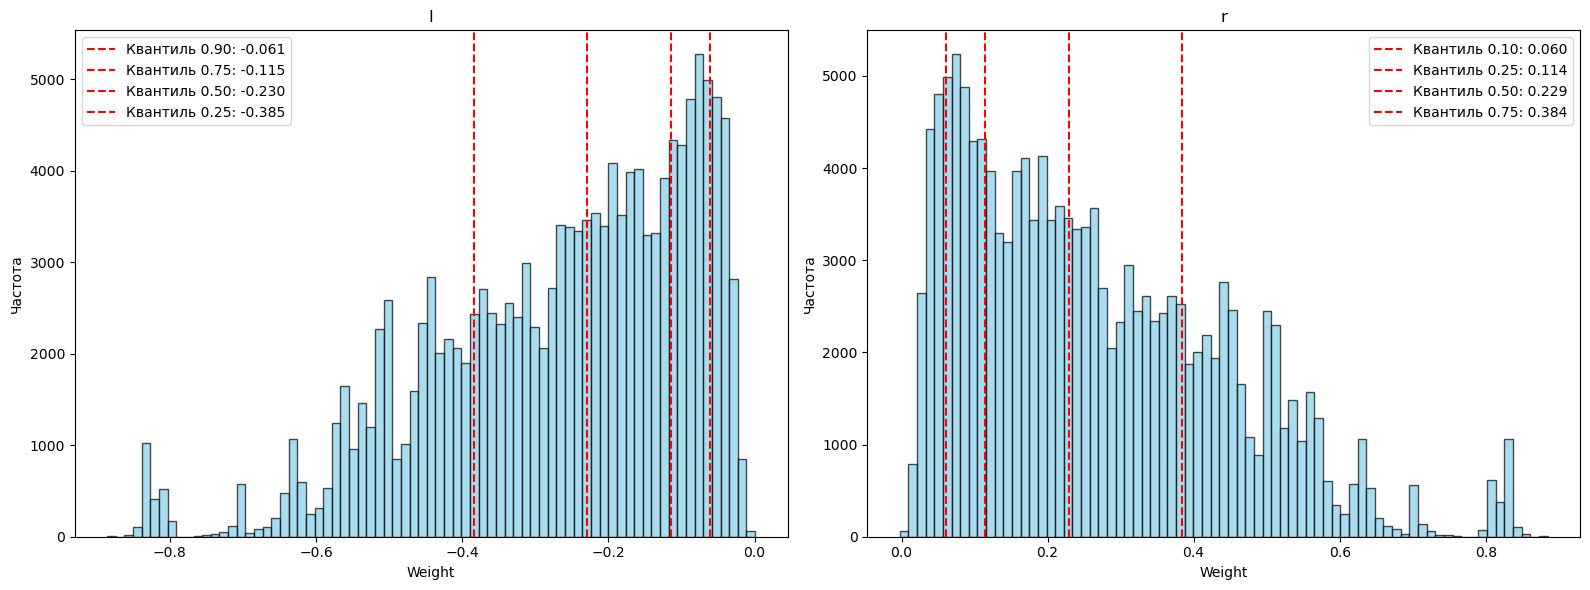

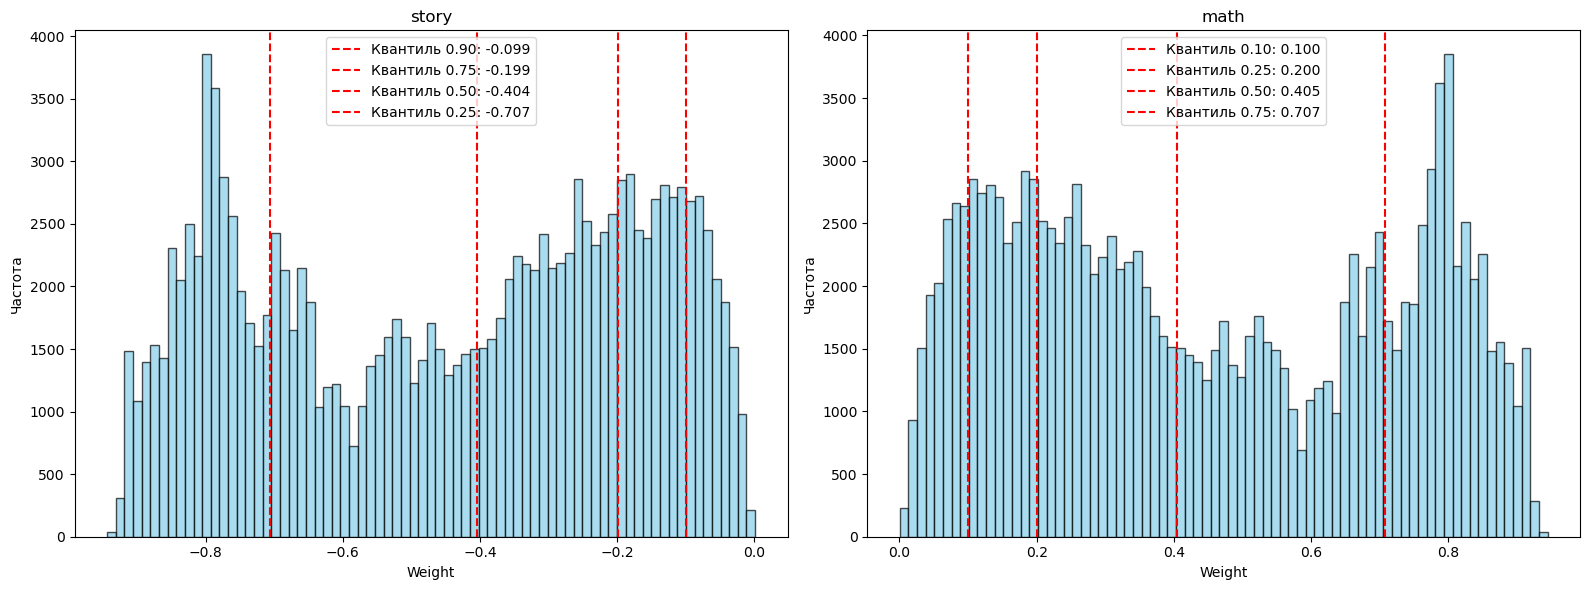

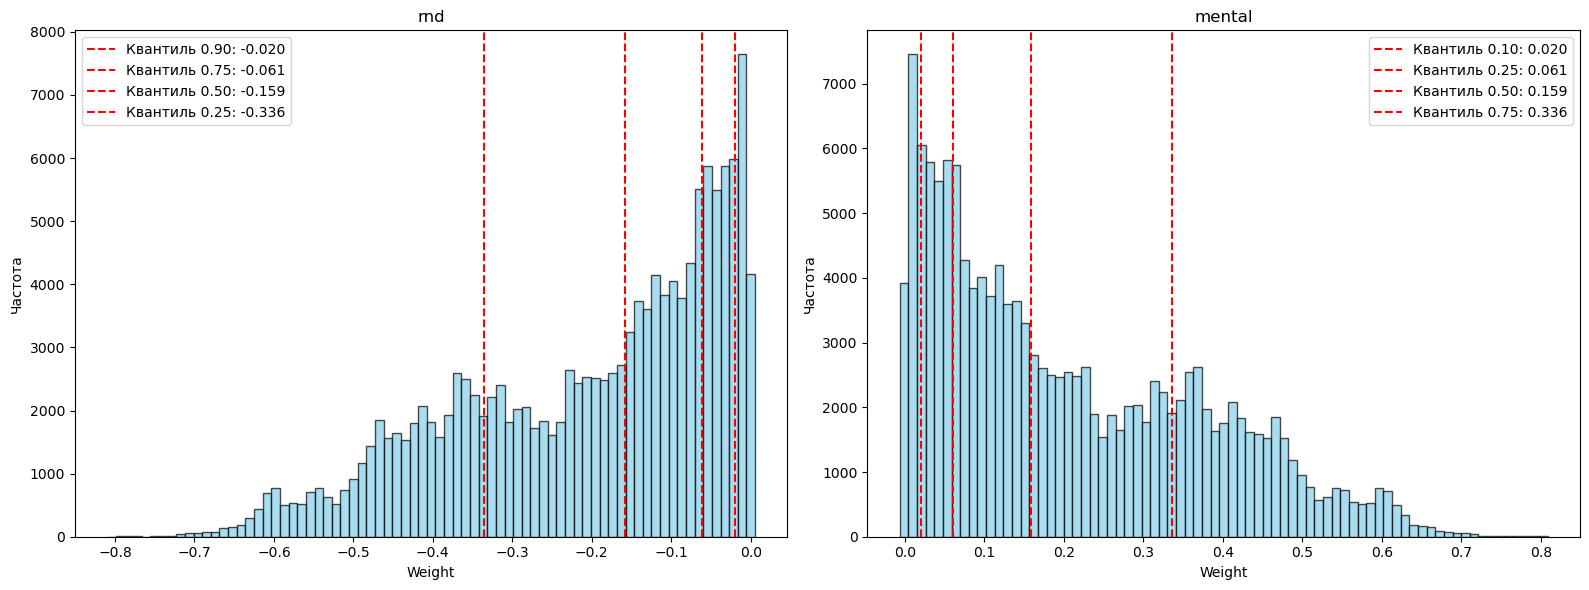

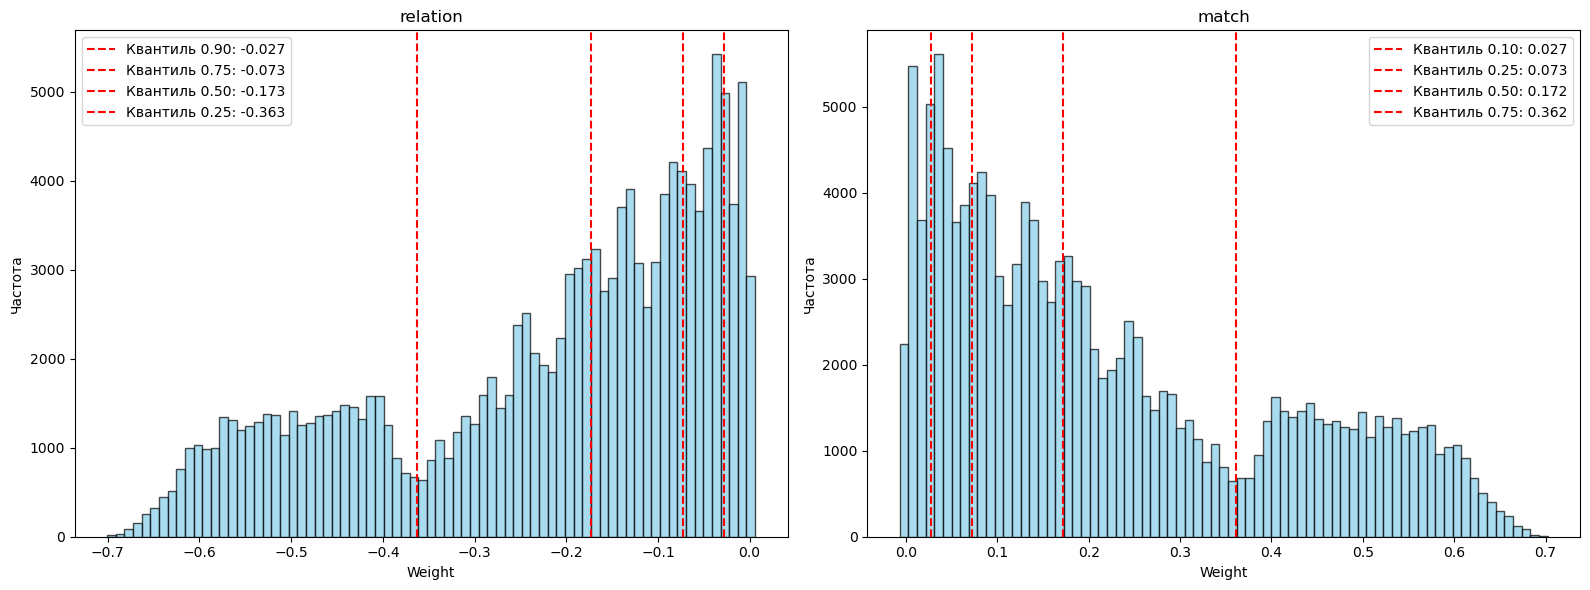

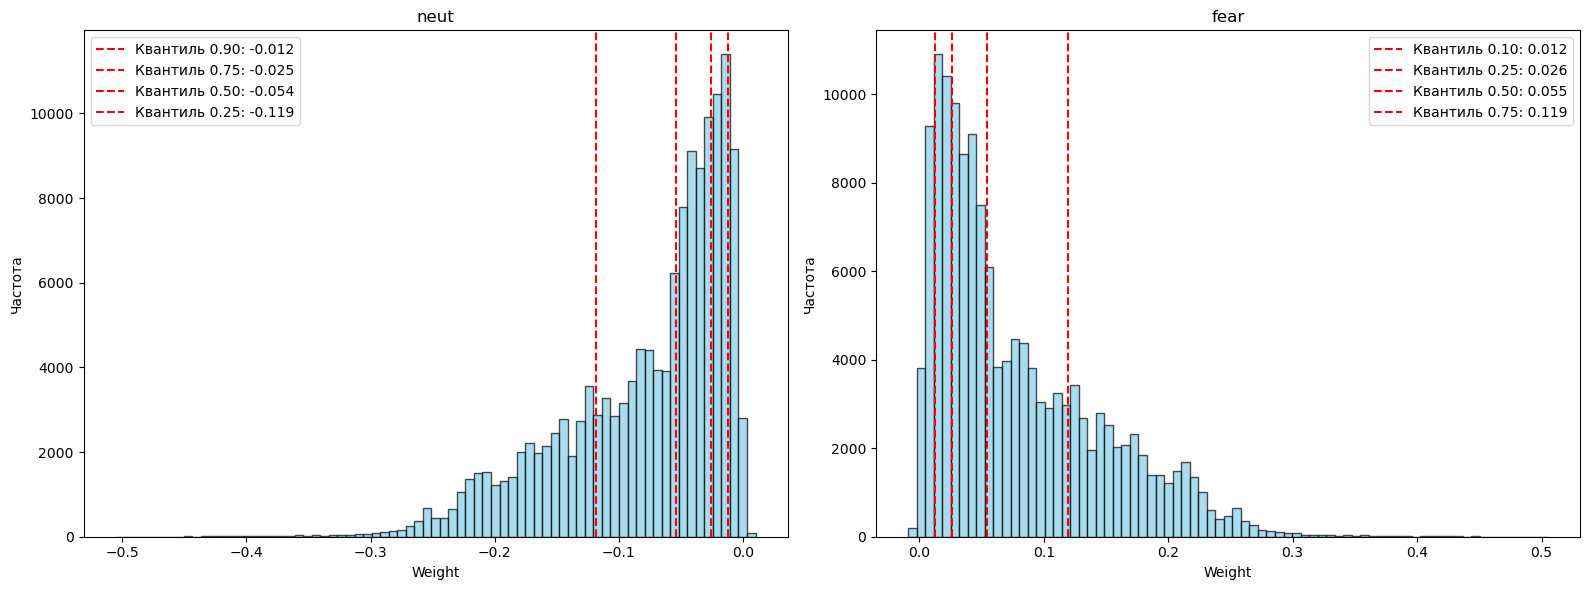

In [33]:
quantiles = [0.1, 0.25, 0.5, 0.75]
weight_distribution(paths.average_network_wm[0], paths.average_network_wm[1], quantiles)
weight_distribution(paths.average_network_gambling[0], paths.average_network_gambling[1], quantiles)
weight_distribution(paths.average_network_motor[0], paths.average_network_motor[1], quantiles)
weight_distribution(paths.average_network_language[0], paths.average_network_language[1], quantiles)
weight_distribution(paths.average_network_social[0], paths.average_network_social[1], quantiles)
weight_distribution(paths.average_network_relational[0], paths.average_network_relational[1], quantiles)
weight_distribution(paths.average_network_emotion[0], paths.average_network_emotion[1], quantiles)

In [ ]:
def filtering(network, w):
    """
    Фильтрация сети через удаление реб с малыми абсолютными значениями весов. 
    
    :param network: Сеть. 
    :param w: Порог.
    :return: 
    """
    # threshold = numpy.percentile(numpy.abs(network), i)
    # matrix_[np.abs(matrix_) <= threshold] = 0

In [10]:
numpy.load(paths.average_network_wm[1])

array([[ 0.        ,  0.22290788,  0.26643696, ...,  0.25275879,
         0.25551155,  0.24861336],
       [ 0.22290788,  0.        ,  0.10672763, ...,  0.05484601,
         0.05085938,  0.11409721],
       [ 0.26643696,  0.10672763,  0.        , ...,  0.05706305,
         0.05403159,  0.19041975],
       ...,
       [ 0.25275879,  0.05484601,  0.05706305, ...,  0.        ,
        -0.00161773,  0.16044355],
       [ 0.25551155,  0.05085938,  0.05403159, ..., -0.00161773,
         0.        ,  0.16001775],
       [ 0.24861336,  0.11409721,  0.19041975, ...,  0.16044355,
         0.16001775,  0.        ]])